# Logistic Regression - Titanic Dataset

In [43]:
import sklearn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

## The Titanic dataset

Source: https://www.kaggle.com/francksylla/titanic-machine-learning-from-disaster

In [5]:
titanic_df = pd.read_csv('datasets/titanic_train.csv')
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
titanic_df.shape

(891, 12)

In [7]:
# How many survived?
print("Percent survived:",titanic_df[titanic_df["Survived"] == 1].shape[0]/titanic_df.shape[0]*100)
print("Percent died:", titanic_df[titanic_df["Survived"] == 0].shape[0]/titanic_df.shape[0]*100)

Percent survived: 38.38383838383838
Percent died: 61.61616161616161


In [8]:
# Drop columns not required
titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], 'columns', inplace=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
titanic_df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [10]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Visualizing relationships

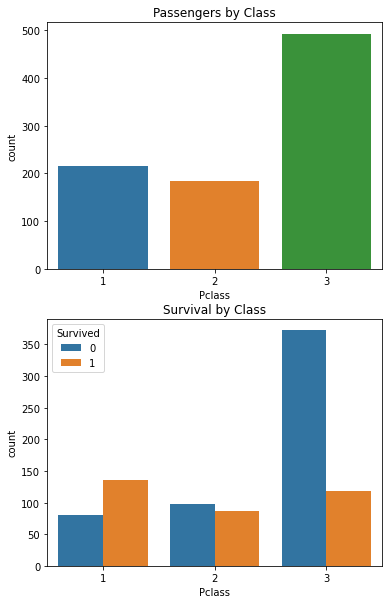

In [12]:
plt.figure(figsize = (6,10))
plt.subplot(211)
sns.countplot(x = 'Pclass', data = titanic_df).set_title("Passengers by Class")
plt.subplot(212)
ax = sns.countplot(x = 'Pclass', hue = 'Survived', data = titanic_df).set_title("Survival by Class")

Of the third class passengers, most died. First class passengers mainly survived.

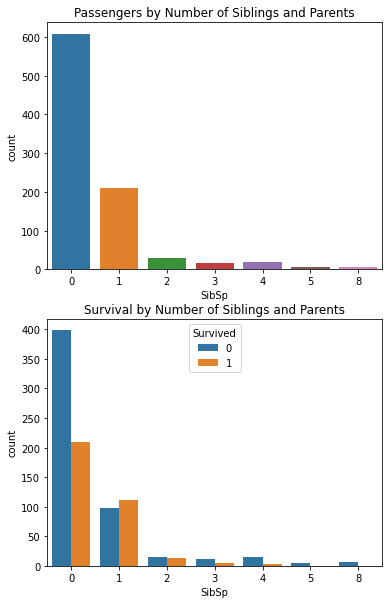

In [13]:
plt.figure(figsize = (6,10))
plt.subplot(211)
sns.countplot(x = 'SibSp', data = titanic_df).set_title("Passengers by Number of Siblings and Parents")
plt.subplot(212)
ax = sns.countplot(x = 'SibSp', hue = 'Survived', data = titanic_df).set_title("Survival by Number of Siblings and Parents")

Most people with no siblings or spouse died. The majority of those with at least one sibling or a spouse survived.

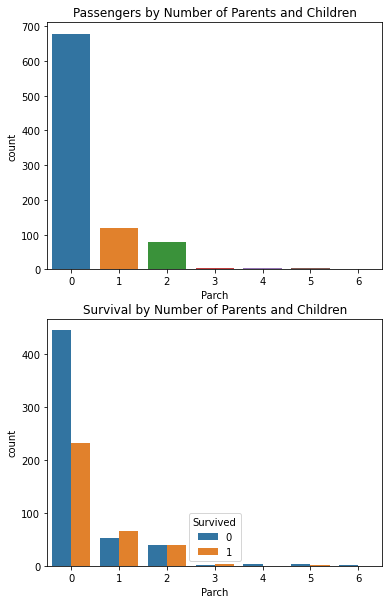

In [14]:
plt.figure(figsize = (6,10))
plt.subplot(211)
sns.countplot(x = 'Parch', data = titanic_df).set_title("Passengers by Number of Parents and Children")
plt.subplot(212)
ax = sns.countplot(x = 'Parch', hue = 'Survived', data = titanic_df).set_title("Survival by Number of Parents and Children")

The majority of those with no parents or children died and those with one or two parents or children mainly survived.

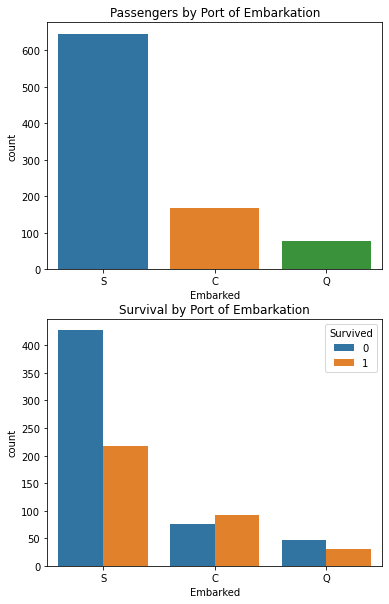

In [15]:
plt.figure(figsize = (6,10))
plt.subplot(211)
sns.countplot(x = 'Embarked', data = titanic_df).set_title("Passengers by Port of Embarkation")
plt.subplot(212)
ax = sns.countplot(x = 'Embarked', hue = 'Survived', data = titanic_df).set_title("Survival by Port of Embarkation")

Most passengers embarked at Southampton and the majority of those died

In [16]:
pd.crosstab(titanic_df['Embarked'], titanic_df['Survived'])

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


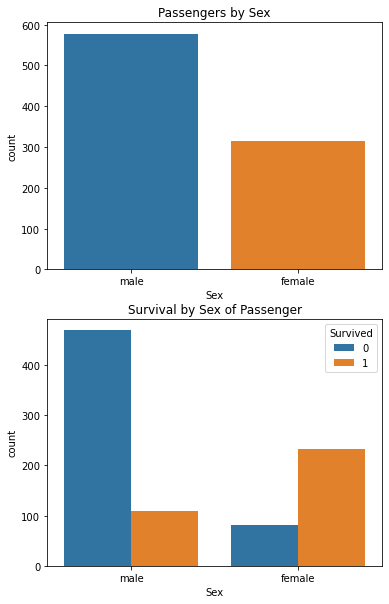

In [17]:
plt.figure(figsize = (6,10))
plt.subplot(211)
sns.countplot(x = 'Sex', data = titanic_df).set_title("Passengers by Sex")
plt.subplot(212)
ax = sns.countplot(x = 'Sex', hue = 'Survived', data = titanic_df).set_title("Survival by Sex of Passenger")

Females were more likely to survive than males

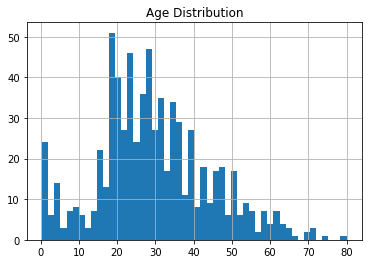

In [18]:
titanic_df["Age"].hist(bins = 50)
ax = plt.title("Age Distribution")

Most passengers were in there twenties and thirties

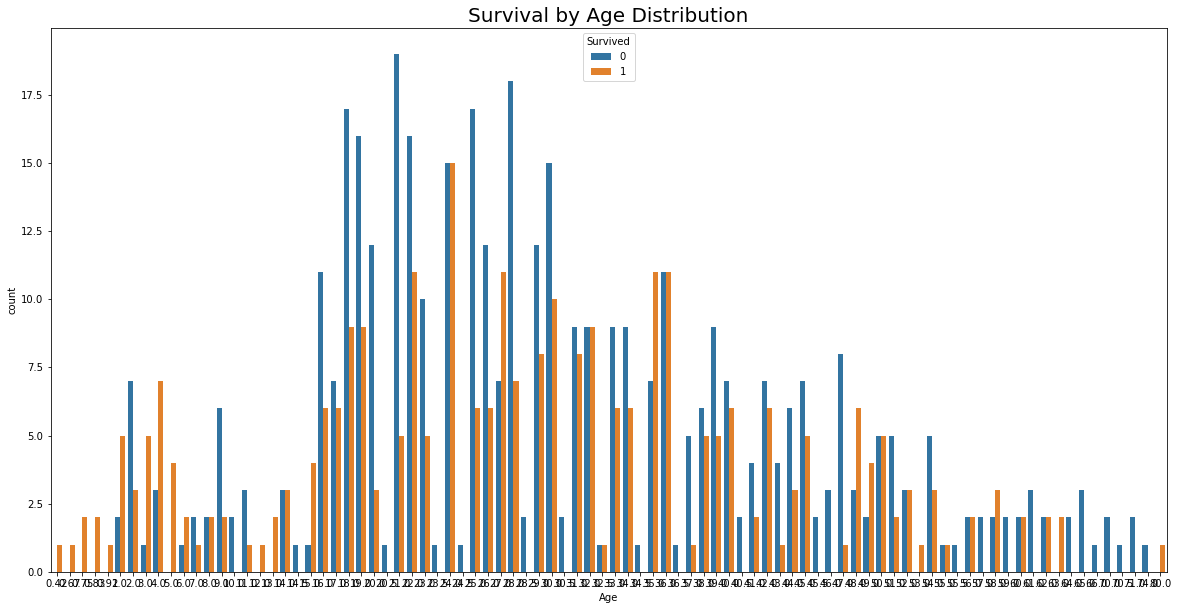

In [19]:
plt.figure(figsize = (20,10))
sns.countplot(x = "Age", data = titanic_df, hue = "Survived")
ax = plt.title("Survival by Age Distribution", fontsize = 20)

Babies most likely to survive, those in there teens to thirties most likely to die as were the elderly

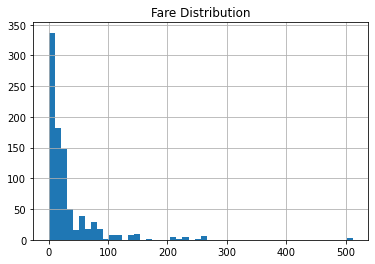

In [20]:
titanic_df["Fare"].hist(bins = 50)
ax = plt.title("Fare Distribution")

Positive skew, most passengers paid the lowest fares

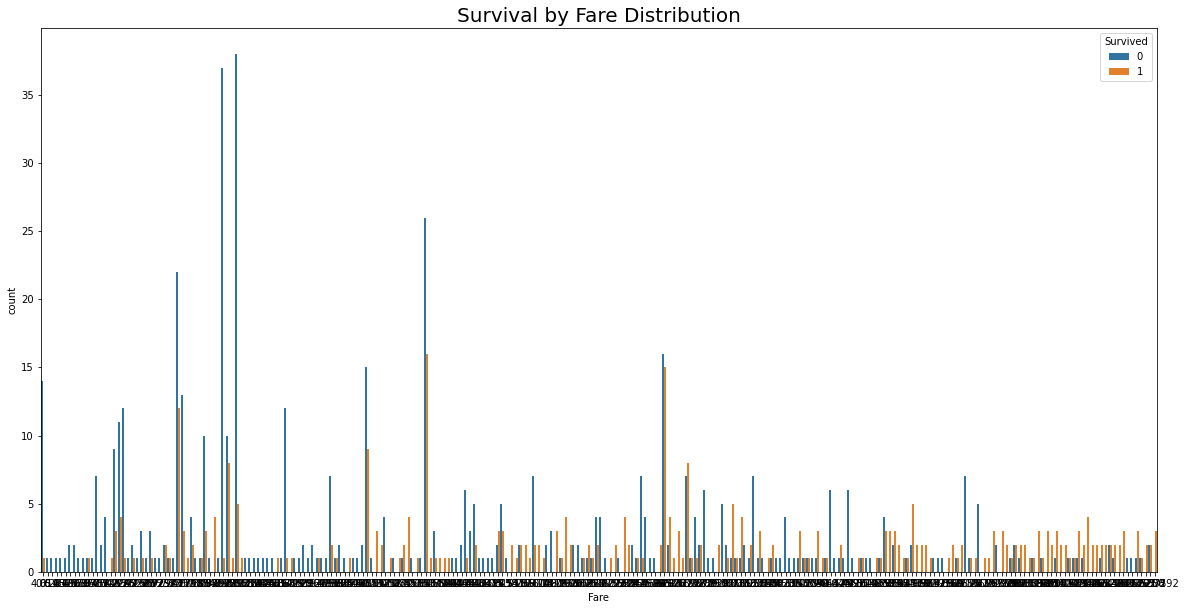

In [21]:
plt.figure(figsize = (20,10))
sns.countplot(x = "Fare", data = titanic_df, hue = "Survived")
ax = plt.title("Survival by Fare Distribution", fontsize = 20)

Those paying higher fares more likely to survive

In [22]:
# Correlations
titanic_data_corr = titanic_df.corr()
titanic_data_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Survival positively correlated with fare and negatively correlated with age and class

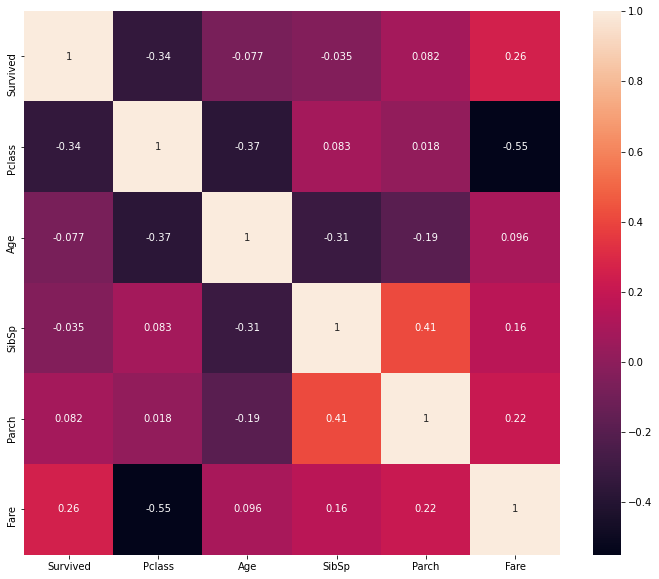

In [23]:
fig, ax = plt.subplots(figsize=(12, 10))
ax = sns.heatmap(titanic_data_corr, annot=True)

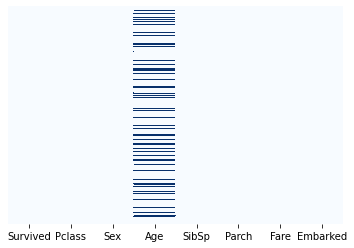

In [24]:
ax = sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

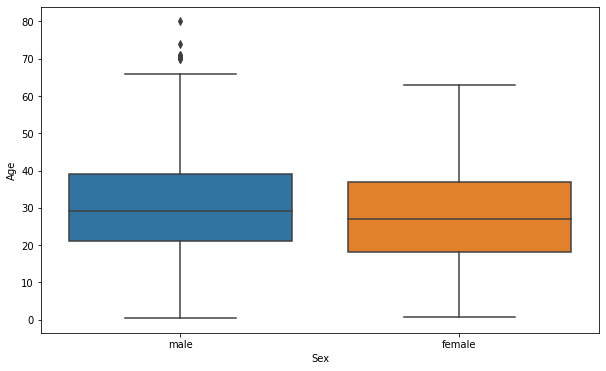

In [25]:
# Look at boxplot of the male and female ages
plt.figure(figsize = (10,6))
ax = sns.boxplot(x = "Sex", y = "Age", data = titanic_df)

## Preprocessing

In [26]:
# Get median ages of male and females
print(titanic_df[titanic_df["Sex"] == "male"]["Age"].median())
print(titanic_df[titanic_df["Sex"] == "female"]["Age"].median())

29.0
27.0


In [27]:
# Function to impute age
def impute_age(data):
    age = data[0]
    sex = data[1]
    if pd.isnull(age):
        if sex == "male":
            return 29
        else:
            return 27
    else:
        return age

In [28]:
# Replace age values where missing with median
titanic_df["Age"] = titanic_df[["Age","Sex"]].apply(impute_age, axis = 1)

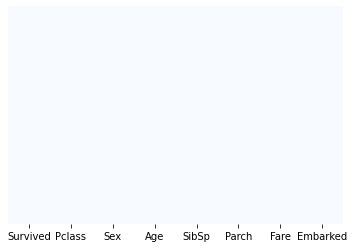

In [29]:
ax = sns.heatmap(titanic_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")

In [44]:
# Label encode the sex column
label_encoding = LabelEncoder()
titanic_df['Sex'] = label_encoding.fit_transform(titanic_df['Sex'].astype(str))

In [31]:
label_encoding.classes_

array(['female', 'male'], dtype=object)

#### C = Cherbourg,  Q = Queenstown,  S = Southampton

In [32]:
# Use one-hot encoding for the embarkation column
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'])
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


In [33]:
# Shuffle the data
titanic_df = titanic_df.sample(frac=1).reset_index(drop=True)
titanic_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,44.0,0,1,16.1000,0,0,1
1,0,3,1,34.0,1,1,14.4000,0,0,1
2,1,3,0,27.0,1,0,15.5000,0,1,0
3,0,3,0,27.0,0,2,7.7500,0,1,0
4,1,3,0,27.0,0,0,7.8792,0,1,0


In [45]:
# Set X and y and split the data
X = titanic_df.drop('Survived', axis=1)
Y = titanic_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [46]:
# Using l2 regularisation (penalty on overly complex models) and fit on the data then predict against the test set
logistic_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear').fit(x_train, y_train)
y_pred = logistic_model.predict(x_test)

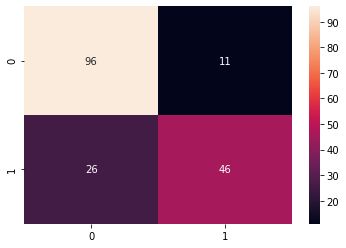

In [48]:
cm = confusion_matrix(y_test, y_pred)
ax = sns.heatmap(cm, annot = True, fmt = "d")

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       107
           1       0.81      0.64      0.71        72

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



Precision score - how many of the passengers did we predict survive actually survive?

Recall score - how many of the actual survivers did the model predict?